<center>
<h1> TP-Projet d'optimisation </h1>
<h1> Année 2020-2021 - ModIA </h1>
<h1> Nom et prénom : Aussel Baptiste </h1>
<h1> Nom et prénom :  Cintas Albin</h1>    
</center>

# Algorithme de Newton
## Implémentation 
 
1. Coder l’algorithme de Newton local tel que décrit dans la section *Algorithme de Newton* (fichier `Algorithme_De_Newton.jl`)

2. Tester l’algorithme sur les fonctions $f_{1}$ , $f_{2}$ avec les points initiaux $x_{011}$ , $x_{012}$ (pour $f_{1}$ ) et $x_{021}$ , $x_{022}$ , $x_{023}$ (pour $f_{2}$ ) donnés en Annexe A.

In [1]:
#using Pkg; Pkg.add("LinearAlgebra"); Pkg.add("Markdown")
# using Documenter
using LinearAlgebra
using Markdown                             # Pour que les docstrings en début des fonctions ne posent
                                           # pas de soucis. Ces docstrings sont utiles pour générer 
                                           # la documentation sous GitHub
include("Algorithme_De_Newton.jl")


# Affichage les sorties de l'algorithme des Régions de confiance
function my_afficher_resultats(algo,nom_fct,point_init,xmin,fxmin,flag,sol_exacte,nbiters)
	println("-------------------------------------------------------------------------")
	printstyled("Résultats de : ",algo, " appliqué à ",nom_fct, " au point initial ", point_init, ":\n",bold=true,color=:blue)
	println("  * xsol = ",xmin)
	println("  * f(xsol) = ",fxmin)
	println("  * nb_iters = ",nbiters)
	println("  * flag = ",flag)
	println("  * sol_exacte : ", sol_exacte)
end

# Fonction f0
# -----------
f0(x) =  sin(x)
# la gradient de la fonction f0
grad_f0(x) = cos(x)
# la hessienne de la fonction f0
hess_f0(x) = -sin(x)
sol_exacte = -pi/2

# Fonction f1
# -----------
f1(x) = 2*(x[1]+x[2]+x[3]-3)^2+(x[1]-x[2])^2+(x[2]-x[3])^2
# la gradient de la fonction f1
grad_f1(x) = [6*x[1]+2*x[2]+4*x[3]-12; 2*x[1]+8*x[2]+2*x[3]-12; 4*x[1]+2*x[2]+6*x[3]-12]
# la hessienne de la fonction f1
hess_f1(x) = [6 2 4; 2 8 2; 4 2 6]

# Fonction f2
# --------
f2(x) = 100 * (x[2] - x[1]^2)^2 + (1-x[1])^2
# gradient de f2 
grad_f2(x) = [400*x[1]^3-400*x[1]*x[2]+2*x[1]-2,200*x[2]-200*x[1]^2]
# hessienne de f2
function hess_f2(x)
    to_return = [1200*x[1]^2-400*x[2]+2 -400*x[1]; -400*x[1] 200]
    return to_return 
end 
options = []

x0 = sol_exacte
xmin,f_min,flag,nb_iters = Algorithme_De_Newton(f0,grad_f0,hess_f0,x0,options)
my_afficher_resultats("Newton","f0",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = -pi/2+0.5
xmin,f_min,flag,nb_iters = Algorithme_De_Newton(f0,grad_f0,hess_f0,x0,options)
my_afficher_resultats("Newton","f0",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = pi/2
xmin,f_min,flag,nb_iters = Algorithme_De_Newton(f0,grad_f0,hess_f0,x0,options)
my_afficher_resultats("Newton","f0",x0,xmin,f_min,flag,sol_exacte,nb_iters)

sol_exacte = [1, 1, 1]
x0 = [1, 0, 0]
xmin,f_min,flag,nb_iters = Algorithme_De_Newton(f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Newton","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = [10 ,3 ,-2.2]
xmin,f_min,flag,nb_iters = Algorithme_De_Newton(f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Newton","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)

sol_exacte = [1, 1]
x0 = [-1.2, 1]
xmin,f_min,flag,nb_iters = Algorithme_De_Newton(f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Newton","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = [10,0]
xmin,f_min,flag,nb_iters = Algorithme_De_Newton(f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Newton","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = [0, 1/200+1/(10e12)]
xmin,f_min,flag,nb_iters = Algorithme_De_Newton(f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Newton","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)

-------------------------------------------------------------------------
Résultats de : Newton appliqué à f0 au point initial -1.5707963267948966:
  * xsol = -1.5707963267948966
  * f(xsol) = -1.0
  * nb_iters = 0
  * flag = 2
  * sol_exacte : -1.5707963267948966
-------------------------------------------------------------------------
Résultats de : Newton appliqué à f0 au point initial -1.0707963267948966:
  * xsol = -1.5707963267948966
  * f(xsol) = -1.0
  * nb_iters = 3
  * flag = 2
  * sol_exacte : -1.5707963267948966
-------------------------------------------------------------------------
Résultats de : Newton appliqué à f0 au point initial 1.5707963267948966:
  * xsol = 1.5707963267948966
  * f(xsol) = 1.0
  * nb_iters = 0
  * flag = 2
  * sol_exacte : -1.5707963267948966
-------------------------------------------------------------------------
Résultats de : Newton appliqué à f1 au point initial [1, 0, 0]:
  * xsol = [1.0, 1.0, 0.9999999999999999]
  * f(xsol) = 1.232595164407

LoadError: SingularException(2)

## Interprétation 

Justifier

1. les résultats obtenus pour l'exemple $f_0$ ci-dessus;

2. que l’algorithme implémenté converge en une itération pour $f_{1}$;

3. que l’algorithme puisse ne pas converger pour $f_{2}$ avec certains points initiaux.

## Vos réponses?


1) Cas de $f_0$ :

Dans le cas $x_{01}=-\frac{\pi}{2}$, on est directement sur un minimum de notre fonction $f_0(x) = sin(x)$ qui vaut $sin(-\frac{\pi}{2}) = -1.0$ donc on ne bouge pas, les flags 0, 1 et 2 s'activent. Dans notre cas, on a choisi d'activer le dernier flag lorsque plusieurs s'activent. 

Dans le cas $x_{02}=-\frac{\pi}{2} + 0.5$ on converge en 3 itérations vers la même solution, on sort sur une stagnation de $f$ après 3 itérations car $x_{02}$ est un point critique. 

Dans le cas $x_{03}=\frac{\pi}{2}$, on est directement sur un maximum, donc on sort comme dans le cas de $x_{01}$. Ceci s'explique par le fait que l'algorithme de Newton ne cherche qu'à annuler le gradient. 

2) Cas de $f_1$ :

L'algorithme de Newton vise en fait à minimiser le développement de Taylor à l'ordre 2 de la fonction $f_1$ en $x_p$ à chaque itération. Ici $f_1$ est quadratique, donc elle est égale à son développement à l'ordre 2. Ainsi à la première itération on minimise $f_1$.

3) Cas de $f_2$:

Avec certains points initiaux, la hessienne peut ne plus être inversible à partir de certaines itérations, ce qui est le cas pour notre $x_{02}$.

# Régions de confiance avec pas de cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). Tester sur les quadratiques proposées en Annexe B.

2. Coder l'algorithme de régions de confiance (fichier `Regions_De_Confiance.jl`). Tester sur les problèmes de l’Annexe A.

In [2]:
include("Pas_De_Cauchy.jl")


g_b1=[0,0]
g_b2=[6,2]
g_b3=[-2,1]
H_b1 = [7 0 ; 0 2]
H_b2 = copy(H_b1)
H_b3 = [-2 0 ; 0 10]


Pas_De_Cauchy(g_b2, H_b2, 2)

([-0.9230769230769234, -0.30769230769230776], 1)

In [3]:
# Vos tests
include("Regions_De_Confiance.jl")
include("Gradient_Conjugue_Tronque.jl")


# Fonction f1
# ---------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3)^2 + (x[1] - x[2])^2 + (x[2] - x[3])^2 
# gradient de f1
grad_f1(x) = [6*x[1] + 2*x[2] + 4*x[3] - 12, 2*x[1] + 8*x[2] + 2*x[3] - 12, 4*x[1] + 2*x[2] + 6*x[3] - 12]
# hessienne de f1
hess_f1(x) = [6 2 4 ; 2 8 2 ; 4 2 6]

# Fonction f2
# --------
f2(x) = 100 * (x[2] - x[1]^2)^2 + (1-x[1])^2
# gradient de f2 
grad_f2(x) = [400*x[1]^3-400*x[1]*x[2]+2*x[1]-2,200*x[2]-200*x[1]^2]
# hessienne de f2
function hess_f2(x)
    to_return = [1200*x[1]^2-400*x[2]+2 -400*x[1]; -400*x[1] 200]
    return to_return 
end 
options = []


sol_exacte = [1, 1, 1]
x0 = [1, 0, 0]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = [10 ,3 ,-2.2]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)

sol_exacte = [1, 1]
x0 = [-1.2, 1]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = [10,0]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = [0, 1/200+1/(10e12)]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)

-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec Cauchy appliqué à f1 au point initial [1, 0, 0]:
  * xsol = [1.0000000000020828, 0.9999999999996146, 0.9999999999971467]
  * f(xsol) = 1.4854809087661613e-23
  * nb_iters = 77
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec Cauchy appliqué à f1 au point initial [10.0, 3.0, -2.2]:
  * xsol = [1.000000000011614, 1.0000000000017701, 0.9999999999919266]
  * f(xsol) = 2.501994088678869e-22
  * nb_iters = 78
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec Cauchy appliqué à f2 au point initial [-1.2, 1.0]:
  * xsol = [0.9999999994422537, 0.9999999988828127]
  * f(xsol) = 3.113681476210788e-19
  * nb_iters = 15710
  * flag = 1
  * sol_exacte : [1, 1]
--------------------

## Interprétation 

1. Quelle relation lie la fonction test $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres.

## Vos réponses?


1) Comme nous l'avions remarqué à la question 2 sur l'algorithme de Newton, la fonction $f_1$ est quadratique, donc égale à son développement de Taylor à l'ordre deux. Ainsi, l'algorithme de Newton, qui minimise ce développement de Taylor était optimal pour cette fonction $f_1$. En ce qu'il s'agit de la région de confiance avec pas de Cauchy, elle converge, mais en plus de 70 itérations, et la solution finale est moins précise. On en déduit donc que pour cette fonction, et plus généralement pour les fonctions quadratiques, l'algorithme de Newton est plus approprié. 

2) Il est possible de jouer également sur les paramètres $\eta_1$, $\eta_2$, $\gamma_1$ et $\gamma_2$ tout en respectant les contraintes suivantes : $0<\gamma_1 <1< \gamma_2$ et $0 < \eta_1< \eta_2 < 1$ : 

Nous procéderons aux évaluations sur la fonction $f_1$ avec la condition initiale [1, 0, 0], et ferons varier $\gamma_1$ et $\eta_1$ :

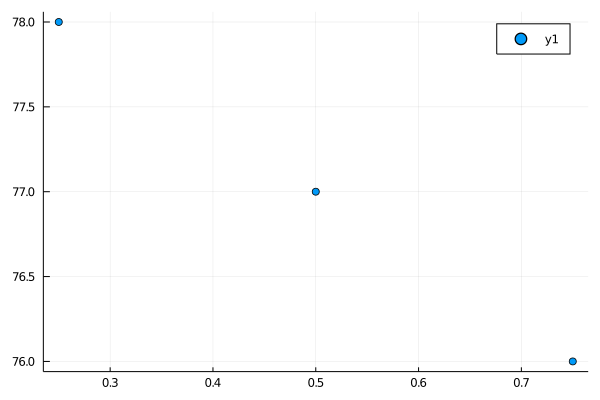

In [4]:
using Plots
sol_exacte = [1, 1, 1]
### VARIATION DE 𝛾1 : 
𝛾1_lst = [0.25, 0.5, 0.75]
ite_lst = []
erreur = []
x0 = [1, 0, 0]
for 𝛾 in 𝛾1_lst 
    xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f1,grad_f1,hess_f1,x0,[10,𝛾, 2.0, 0.25, 0.75, 2, 20000, sqrt(eps()), [1e-12,1e-15]])
    append!(ite_lst, nb_iters)
    append!(erreur, sum(broadcast(abs, xmin-sol_exacte)))
end
plot(𝛾1_lst,ite_lst, seriestype = :scatter)

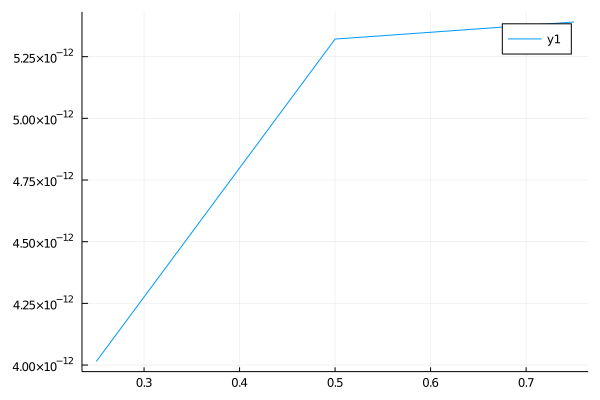

In [5]:
plot(𝛾1_lst,erreur)

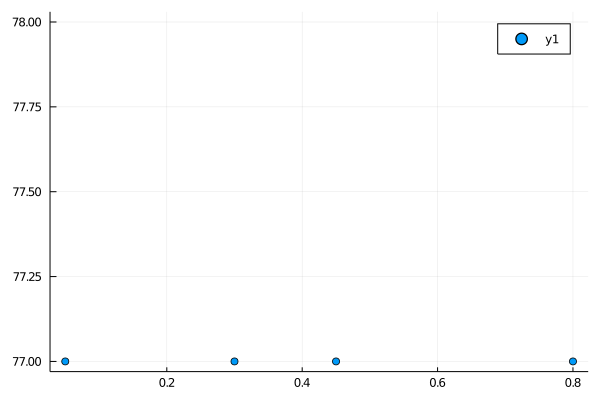

In [6]:
### VARIATION DE 𝜂1 : 
𝜂1_lst = [0.05, 0.3 , 0.45, 0.8]
ite_lst = []
erreur = []
x0 = [1, 0, 0]
for 𝜂 in 𝜂1_lst 
    xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f1,grad_f1,hess_f1,x0,[10,0.5, 2.0, 𝜂, 0.75, 2, 20000, sqrt(eps()), [1e-12,1e-15]])
    append!(ite_lst, nb_iters)
    err = sum(broadcast(abs, xmin-sol_exacte))
    append!(erreur,  err)
end
plot(𝜂1_lst, ite_lst, seriestype = :scatter)

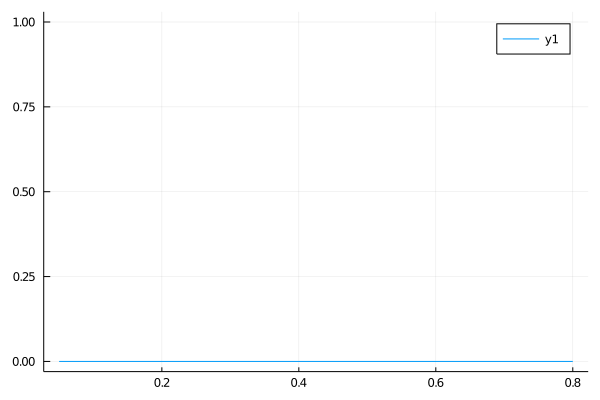

In [7]:
plot(𝜂1_lst, erreur)

Si on analyse comment est construit l'algorithme de région de confiance : 

On se rend compte dans un premier temps que $\eta_1$ va correspondre à l'exigence portée sur $\rho$ afin d'accepter un pas. Dans notre cas, on ne remarque pas d'effet de l'augmentation ou la diminution de $\eta_1$.

De plus, dans la fonction Région de Confiance, on observe que plus $\gamma_1$ est petit, plus la région de confiance va diminuer rapidemment. On fera donc moins d'itérations mais on risque de perdre en précision dans l'approximation de $f$. On observe bien cette diminution du nombre d'itérations, mais cette perte de précision sur la réponse. 

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué, en se basant sur le cours (fichier `Gradient_Conjugue_Tronque.jl`).
On validera les résultats sur les fonctions de l’Annexe C.

2. Intégrer finalement l’algorithme du Gradient Conjugué Tronqué dans le code de
régions de confiance, et appliquer ce code pour résoudre les exemples proposés en
Annexe A.

In [8]:
include("Gradient_Conjugue_Tronque.jl")


g_c1=[0,0]
g_c2=[2,3]
g_c3=[2,0]

H_c1 = copy(H_b3)
H_c2 = [4 6 ; 6 5]
H_c3 = [4 0 ; 0 -15]

Gradient_Conjugue_Tronque(g_c2, H_c2, options)

([1.1782448197996298, -1.6160876042514951], 1)

In [9]:
include("Regions_De_Confiance.jl")
include("Gradient_Conjugue_Tronque.jl")


# Fonction f1
# ---------
f1(x) = 2 * (x[1] + x[2] + x[3] - 3)^2 + (x[1] - x[2])^2 + (x[2] - x[3])^2
# gradient de f1
grad_f1(x) = [6*x[1] + 2*x[2] + 4*x[3] - 12, 2*x[1] + 8*x[2] + 2*x[3] - 12, 4*x[1] + 2*x[2] + 6*x[3] - 12]
# hessienne de f1
hess_f1(x) = [6 2 4 ; 2 8 2 ; 4 2 6]

# Fonction f2
# --------
f2(x) = 100 * (x[2] - x[1]^2)^2 + (1-x[1])^2
# gradient de f2 
grad_f2(x) = [400*x[1]^3-400*x[1]*x[2]+2*x[1]-2,200*x[2]-200*x[1]^2]
# hessienne de f2
function hess_f2(x)
    to_return = [1200*x[1]^2-400*x[2]+2 -400*x[1]; -400*x[1] 200]
    return to_return 
end 
options = []


sol_exacte = [1, 1, 1]
x0 = [1, 0, 0]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = [10 ,3 ,-2.2]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)

sol_exacte = [1, 1]
x0 = [-1.2, 1]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = [10,0]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
x0 = [0, 1/200+1/(10e12)]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)


-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC appliqué à f1 au point initial [1, 0, 0]:
  * xsol = [1.0000000000000004, 1.0, 0.9999999999999998]
  * f(xsol) = 2.465190328815662e-31
  * nb_iters = 3
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC appliqué à f1 au point initial [10.0, 3.0, -2.2]:
  * xsol = [0.9999999999999999, 0.9999999999999998, 1.0000000000000002]
  * f(xsol) = 2.0954117794933126e-31
  * nb_iters = 5
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC appliqué à f2 au point initial [-1.2, 1.0]:
  * xsol = [1.0000000000000284, 1.0000000000000568]
  * f(xsol) = 8.077935669463161e-28
  * nb_iters = 32
  * flag = 2
  * sol_exacte : [1, 1]
------------------------------------------------

## Interprétation  

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en retournant, dans
un premier temps le dernier itéré admissible à courbure positive (c’est à dire, que si
l’une ou l’autre des deux conditions (b) ou (d) sont rencontrées dans l’algorithme 3,
alors on ne calcule pas ``σ_{j}`` et on retourne le dernier itéré ``s_{j}`` directement).

2. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme 3 au bout d’une itération seulement. Que remarquez vous ?

3. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.

4. Quels sont les avantages et inconvénients des deux approches ?

## Vos réponses?


In [10]:
include("comp_TGC_PDC.jl")
include("Gradient_Conjugue_Tronque.jl")
include("Regions_De_Confiance.jl")
sol_exacte = [1, 1, 1]
x0 = [1, 0, 0]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gctb", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC_bis","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f1,grad_f1,hess_f1,x0,options, 1)
my_afficher_resultats("Regions_De_Confiance avec TGC et 1 ité","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)

-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec Cauchy appliqué à f1 au point initial [1, 0, 0]:
  * xsol = [1.0000000000020828, 0.9999999999996146, 0.9999999999971467]
  * f(xsol) = 1.4854809087661613e-23
  * nb_iters = 77
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC_bis appliqué à f1 au point initial [1, 0, 0]:
  * xsol = [1.0000000000000004, 1.0, 0.9999999999999998]
  * f(xsol) = 2.465190328815662e-31
  * nb_iters = 3
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC et 1 ité appliqué à f1 au point initial [1, 0, 0]:
  * xsol = [1.0000000000020828, 0.9999999999996146, 0.9999999999971467]
  * f(xsol) = 1.4854809087661613e-23
  * nb_iters = 77
  * flag = 2
  * sol_exacte : [1, 1, 1]
-----------------

In [11]:
x0 = [10 ,3 ,-2.2]
sol_exacte = [1, 1, 1]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gctb", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC_bis","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f1,grad_f1,hess_f1,x0,options, 1)
my_afficher_resultats("Regions_De_Confiance avec TGC et 1 ité","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f1,grad_f1,hess_f1,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)

-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec Cauchy appliqué à f1 au point initial [10.0, 3.0, -2.2]:
  * xsol = [1.000000000011614, 1.0000000000017701, 0.9999999999919266]
  * f(xsol) = 2.501994088678869e-22
  * nb_iters = 78
  * flag = 0
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC_bis appliqué à f1 au point initial [10.0, 3.0, -2.2]:
  * xsol = [0.9999999999999998, 1.0000000000000002, 1.0000000000000002]
  * f(xsol) = 1.9721522630525295e-31
  * nb_iters = 5
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC et 1 ité appliqué à f1 au point initial [10.0, 3.0, -2.2]:
  * xsol = [1.0000000000116145, 1.0000000000017701, 0.9999999999919259]
  * f(xsol) = 2.502307005148067e-22
  * nb_iters = 78
  * flag = 0
  * sol

In [12]:
sol_exacte = [1, 1]
x0 = [-1.2, 1]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gctb",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC_bis","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f2,grad_f2,hess_f2,x0,options, 1)
my_afficher_resultats("Regions_De_Confiance avec TGC et 1 ité","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)

-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec Cauchy appliqué à f2 au point initial [-1.2, 1.0]:
  * xsol = [0.9999999994422537, 0.9999999988828127]
  * f(xsol) = 3.113681476210788e-19
  * nb_iters = 15710
  * flag = 1
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC_bis appliqué à f2 au point initial [-1.2, 1.0]:
  * xsol = [1.0, 1.0]
  * f(xsol) = 0.0
  * nb_iters = 795
  * flag = 2
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC et 1 ité appliqué à f1 au point initial [-1.2, 1.0]:
  * xsol = [0.999999999443298, 0.9999999988849028]
  * f(xsol) = 3.102038296505578e-19
  * nb_iters = 15708
  * flag = 1
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confianc

In [13]:
sol_exacte = [1, 1]
x0 = [10,0]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gctb",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC_bis","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f2,grad_f2,hess_f2,x0,options, 1)
my_afficher_resultats("Regions_De_Confiance avec TGC et 1 ité","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)

-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec Cauchy appliqué à f2 au point initial [10, 0]:
  * xsol = [0.9999995720206135, 0.9999991485771056]
  * f(xsol) = 1.8522360851015375e-13
  * nb_iters = 861
  * flag = 0
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC_bis appliqué à f2 au point initial [10, 0]:
  * xsol = [1.0, 1.0]
  * f(xsol) = 0.0
  * nb_iters = 12786
  * flag = 0
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC et 1 ité appliqué à f1 au point initial [10, 0]:
  * xsol = [0.9999995720206135, 0.9999991485771056]
  * f(xsol) = 1.8522360851015375e-13
  * nb_iters = 861
  * flag = 0
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC 

In [14]:
sol_exacte = [1, 1]
x0 = [0, 1/200+1/(10e12)]
xmin,f_min,flag,nb_iters = Regions_De_Confiance("cauchy", f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec Cauchy","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gctb",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC_bis","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct", f2,grad_f2,hess_f2,x0,options, 1)
my_afficher_resultats("Regions_De_Confiance avec TGC et 1 ité","f1",x0,xmin,f_min,flag,sol_exacte,nb_iters)
xmin,f_min,flag,nb_iters = Regions_De_Confiance("gct",f2,grad_f2,hess_f2,x0,options)
my_afficher_resultats("Regions_De_Confiance avec TGC","f2",x0,xmin,f_min,flag,sol_exacte,nb_iters)

-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec Cauchy appliqué à f2 au point initial [0.0, 0.0050000000001]:
  * xsol = [0.9999999995218884, 0.9999999990422125]
  * f(xsol) = 2.288353940903732e-19
  * nb_iters = 11129
  * flag = 1
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC_bis appliqué à f2 au point initial [0.0, 0.0050000000001]:
  * xsol = [1.0, 0.9999999999999999]
  * f(xsol) = 1.232595164407831e-30
  * nb_iters = 765
  * flag = 2
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : Regions_De_Confiance avec TGC et 1 ité appliqué à f1 au point initial [0.0, 0.0050000000001]:
  * xsol = [0.9999999995235173, 0.9999999990454727]
  * f(xsol) = 2.272797447807335e-19
  * nb_iters = 11129
  * flag = 1
  * sol_exacte : [1, 1]
-----------------------------------------

1)  Le pas TGC_bis est plus précis et plus rapide que le pas de Cauchy. En effet TGC_bis a tendance à décroitre jusqu'a des valeurs d'ordre compris  entre  la solution exacte et $10^-{28}$ alors que le pas de cauchy converge plus vers des valeurs d'ordre compris entre  $10^{-13}$ et $10^{-23}$.
Le pas TGC_bis  converge en moyenne plus rapidement que le pas de Cauchy.
Cependant on remarque que pour f2 et un point initial $[-10,0]$ TGC_bis, bien que plus précis (valeur exacte contre $10^{-13}$) est beaucoup plus long que cauchy pour converger: 765 contre 11129 itérations.
Cela s'explique par le fait qu'on va interdire a TGC_bis de retourner un trop grand pas qui va saturer la boule. Ainsi cela va l'empecher de réduire f trop rapidement.

2) Si on compare TGC à une itération et Cauchy, on remarque qu'on obtient le même nombre d'itérations et la même décroissance avec les 2 pas appliqués à Région de confiance.
En effet cela est cohérent car le pas TGC fait "au pire" comme Cauchy: s'il s'arrête au bout d'une itération il effectue un pas de cauchy. Donc en le forcant à faire une seule itération on le force a faire comme Cauchy.

    Si gT_H_g est négatif alors on reste dans la boule et on prend un pas dans la direction de descente du gradient. On peut se rapprocher d'une équation de second degré sur R. Notre min n'est pas dans notre interval donc on prend un des deux bord de la boule( vers -g pour le pas de Cauchy, et vers le min des 2 pour TGC)

    Si gT_H_g est positif. On reste à l'interieur de la boule et dans les 2 cas on minimise avec une direction de moins le gradient (pj pour TGC).

Dans la pratique on observe que le nombre maximum d'itération est égal presque partout sauf pour f2 en $x0=[-1.2, 1]$ ou il diffère de 2. Mais une différence de 2 itération pour 15 710 itérations au total reste très faible et peux etre négligée.

Au niveau de la précision les solutions se valent (plus des 15 premiers chiffres significatifs sont égaux à chaque fois). Ainsi malgré de tres légers écarts négligeables, les solutions apportent la même precision.

3) On s'aperçoit que la décroissance de TGC est toujours supérieure à celle de Cauchy. En effet, par exemple pour $f_1$, avec [1,0,0] comme point initial on a une précision de $10^{-31}$ contre $10^{-23}$ pour Cauchy.

La raison de cette différence est que la recherche du pas est bien plus optimisée sur la région de confiance avec le TGC qu'avec Cauchy. Mais ceci induit un temps d'exécution plus long.  

4) En comparant ces deux pas, on s'est rendu compte dans un premier temps que la région de confiance avec un pas de TGC converge généralement en moins d'itérations qu'avec Cauchy. En effet, on a démontré que le pas de Cauchy correspondait en fait à un TGC en 1 itération, donc le TGC est au pire comme Cauchy. 

De plus en termes de précision de la solution, comme le pas est plus optimisé sur le TGC, on obtient une meilleure précision sur les régions de confiance. 

On peut donc en conclure qu'en règle générale TGC est mieux que Cauchy. Cependant, le seul bémol de TGC est que cette recherche de pas est bien plus coûteuse que le pas de Cauchy. 